# Term2 Sprint19 授業課題 
## コーディング課題：データセット作成

## 1. 自作データセットでの分類の学習
自作のデータセットに対して分類問題を解く。任意の実装を使用する。

Yolov3のKeras実装を利用して分類することとする。

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

import os
os.chdir("/content/gdrive/My Drive/Colab Notebooks/ObjectDetection")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
os.getcwd()

'/content/gdrive/My Drive/Colab Notebooks/ObjectDetection'

In [3]:
# darknetを保存
!git clone https://github.com/pjreddie/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 5901, done.
remote: Total 5901 (delta 0), reused 0 (delta 0), pack-reused 5901
Receiving objects: 100% (5901/5901), 6.16 MiB | 7.01 MiB/s, done.
Resolving deltas: 100% (3922/3922), done.
Checking out files: 100% (979/979), done.


In [4]:
cd darknet

/content/gdrive/My Drive/Colab Notebooks/ObjectDetection/darknet


In [5]:
!make

mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/cuda.c -o obj/cuda.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/deconvolutional_layer.c -o obj/deconvolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/convolutional_layer.c -o obj/convolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/list.c -o obj/list.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/image.c -o obj/image.o
gcc 

In [13]:
# 最初の実行時は画像を指定せず、インラインボックスで今回の犬猫画像を続けて指定する。
!./darknet detect cfg/yolov3.cfg yolov3.weights

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

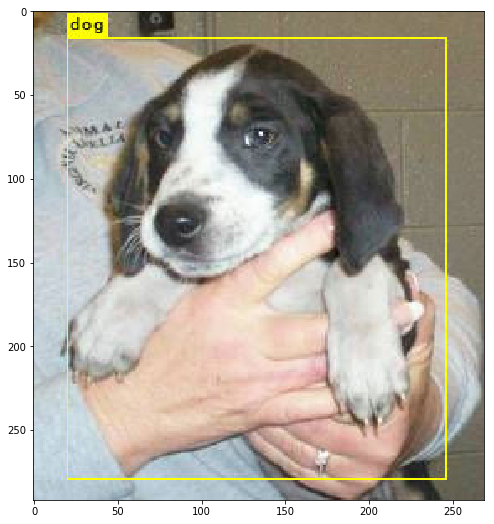

In [14]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# 最後の"dog.10.jpg"の分類画像の読み込み
im = Image.open("./predictions.jpg")

# 画像をarrayに変換
im_list = np.asarray(im)

# 表示
plt.figure(figsize=(20,9))
plt.imshow(im_list)
plt.show()

犬猫を高確率で検出、分類できていることが確認できる。

## 2. 分類データセットに対するデータ拡張
データ拡張（Data Augmentation）を行う。

**データ拡張のためのライブラリ**  
データ拡張にはalbumentationsなどがある。

[albu/albumentations: fast image augmentation library and easy to use wrapper around other libraries](https://github.com/albu/albumentations "albu/albumentations: fast image augmentation library and easy to use wrapper around other libraries")

また、Kerasを使う場合はImageDataGeneratorも便利。


**データ拡張の効果の調査**  
データ拡張には様々な方法がある。今回のタスクにおいて各手法がどう効果があるかを実験・考察する。

------train data set------


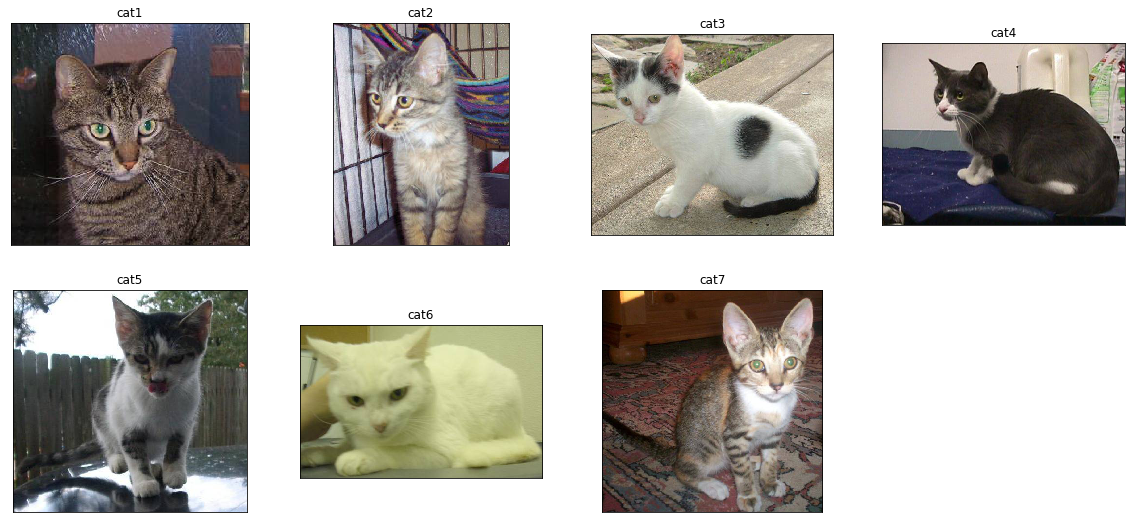

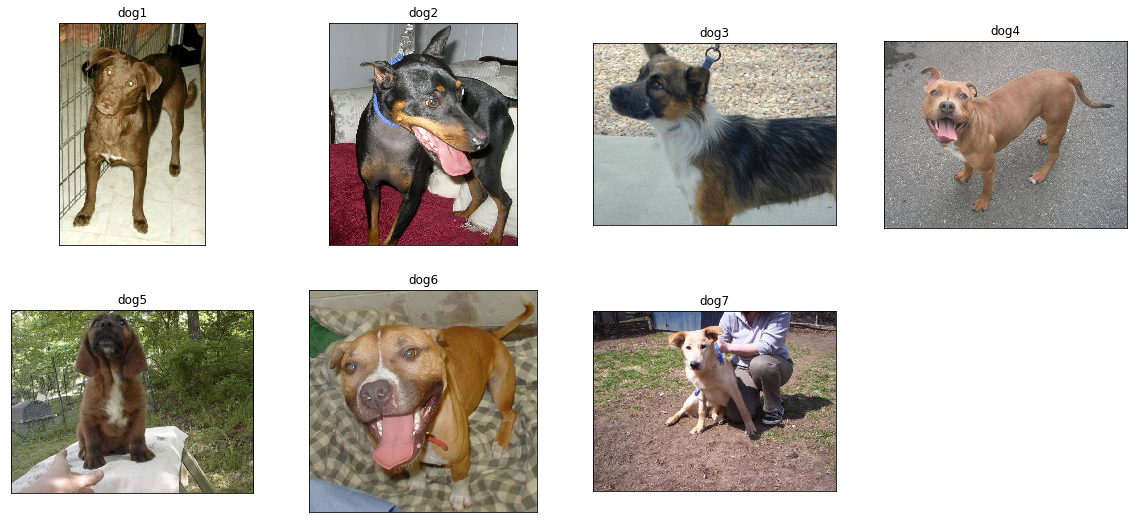

------validation data set------


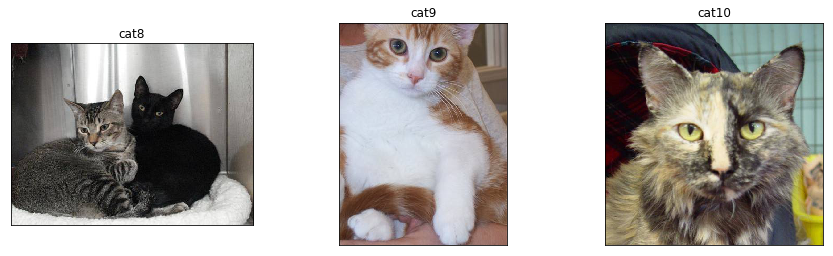

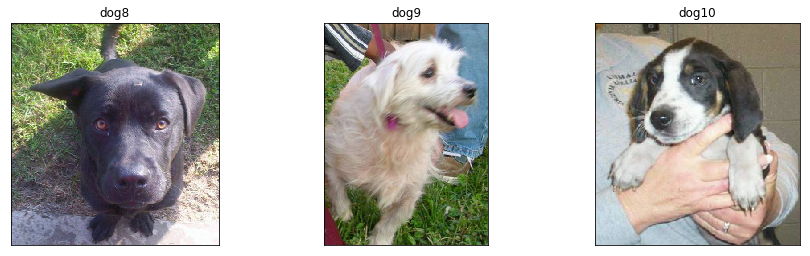

In [63]:
import matplotlib.pyplot as plt

animals = ["cat", "dog"]

# 今回利用する訓練画像を表示
print("------train data set------")
for animal in animals:
  fig = plt.figure(figsize=(20,9))
  for i in range(1,8):
    fig.add_subplot(2,4,i)
    img = plt.imread("data/dog_cat_datasets/train/"+animal+"/"+animal+"."+str(i)+".jpg")
    plt.imshow(img)
    plt.tick_params(labelbottom=False, labelleft=False)
    plt.tick_params(bottom=False, left=False)
    plt.title(animal+str(i))
  plt.show()

# 今回利用する検証画像を表示
print("------validation data set------")
for animal in animals:
  fig = plt.figure(figsize=(20,9))
  for i in range(1,4):
    fig.add_subplot(2,4,i)
    img = plt.imread("data/dog_cat_datasets/validation/"+animal+"/"+animal+"."+str(i+7)+".jpg")
    plt.imshow(img)
    plt.tick_params(labelbottom=False, labelleft=False)
    plt.tick_params(bottom=False, left=False)
    plt.title(animal+str(i+7))
  plt.show()



### VGG-16において、KerasとImageDataGeneratorを使い、全結合層のみ学習させる方法をとる。

In [41]:
import os.path, sys
from pathlib import Path
os.environ['KERAS_BACKEND'] = 'theano'

from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Input
from keras.applications.vgg16 import VGG16
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
import keras.callbacks

N_CATEGORIES  = 1
IMAGE_SIZE = 224
BATCH_SIZE = 4

NUM_TRAINING = 16
NUM_VALIDATION = 4

# トップの全結合層はオリジナルでモデル生成
input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=input_tensor)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(N_CATEGORIES, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# ボトムの畳み込み層は全て学習凍結
for layer in base_model.layers:
   layer.trainable = False
model.compile(optimizer=RMSprop(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

# ImageDataGeneratorで多様な画像を生成
datagen = ImageDataGenerator(
    rescale = 1.0/255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.39,
    horizontal_flip=True,
    samplewise_center=False,
    samplewise_std_normalization =False,
    zca_whitening=False)

classes = ["dog", "cat"]
train_data_path = 'data/dog_cat_datasets/train'
validation_data_path = 'data/dog_cat_datasets/validation'


train_generator = datagen.flow_from_directory(
    train_data_path,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    color_mode='rgb',
    classes=classes,
    class_mode='binary', 
    batch_size=BATCH_SIZE,
    shuffle=True)

validation_generator = datagen.flow_from_directory(
    validation_data_path, 
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    color_mode='rgb',
    classes=classes,
    class_mode='binary',
    batch_size=BATCH_SIZE,
    shuffle=True)


hist = model.fit_generator(train_generator,
   steps_per_epoch=NUM_TRAINING//BATCH_SIZE,
   epochs=20,
   verbose=1,
   validation_data=validation_generator,
   validation_steps=NUM_VALIDATION//BATCH_SIZE,
   )

model.save('dog_cats.hdf5')

/usr/local/lib/python3.6/dist-packages/keras/utils/conv_utils.py:82: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.copy(kernel[slices])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

INFO (theano.gof.compilelock): Refreshing lock /root/.theano/compiledir_Linux-4.14.79+-x86_64-with-Ubuntu-18.04-bionic-x86_64-3.6.7-64/lock_dir/lock


Epoch 1/20
4/4 [==============================] - 14s 4s/step - loss: 0.7650 - acc: 0.3071 - val_loss: 0.6875 - val_acc: 0.7500
Epoch 2/20
4/4 [==============================] - 12s 3s/step - loss: 0.6876 - acc: 0.5000 - val_loss: 0.6751 - val_acc: 0.5000
Epoch 3/20
4/4 [==============================] - 13s 3s/step - loss: 0.6978 - acc: 0.4857 - val_loss: 0.6989 - val_acc: 0.5000
Epoch 4/20
4/4 [==============================] - 12s 3s/step - loss: 0.6746 - acc: 0.5643 - val_loss: 0.6912 - val_acc: 1.0000
Epoch 5/20
4/4 [==============================] - 13s 3s/step - loss: 0.6748 - acc: 0.4500 - val_loss: 0.6644 - val_acc: 0.5000
Epoch 6/20
4/4 [==============================] - 12s 3s/step - loss: 0.6763 - acc: 0.4500 - val_loss: 0.6502 - val_acc: 0.5000
Epoch 7/20
4/4 [==============================] - 13s 3s/step - loss: 0.6475 - acc: 0.8714 - val_loss: 0.6707 - val_acc: 1.0000
Epoch 8/20
4/4 [==============================] - 12s 3s/step - loss: 0.6306 - acc: 0.9357 - val_loss: 0

## 3. 物体検出データセットの用意
次に、物体検出を行う。バウンディングボックスのアノテーションを行い物体検出のためのデータセットを作成する。

**アノテーションのためのツール**  
アノテーションツールにはLabelImgなどがある。

[tzutalin/labelImg: LabelImg is a graphical image annotation tool and label object bounding boxes in images](https://github.com/tzutalin/labelImg "tzutalin/labelImg: LabelImg is a graphical image annotation tool and label object bounding boxes in images")

In [2]:
import os
os.chdir("labelImg-master")
os.getcwd()

'/Users/arimoto/Documents/Github/diveintocode-ml/term2/sprint19/labelImg-master'

In [3]:
!pip3 install pyqt5 lxml # Install qt and lxml by pip

  Using cached https://files.pythonhosted.org/packages/b8/05/0fd9de5eb664ad4c47047d857cd526576b7d45b3108fbb57ba64399be2d5/PyQt5-5.12.2-5.12.3-cp35.cp36.cp37.cp38-abi3-macosx_10_6_intel.whl
     |████████████████████████████████| 61kB 3.7MB/s eta 0:00:011
ERROR: spyder 3.3.4 requires pyqtwebengine<5.13, which is not installed.


In [4]:
!make qt5py3

pyrcc5 -o libs/resources.py resources.qrc


In [5]:
!python3 labelImg.py

objc[14517]: Class FIFinderSyncExtensionHost is implemented in both /System/Library/PrivateFrameworks/FinderKit.framework/Versions/A/FinderKit (0x7fffa2dd5cd0) and /System/Library/PrivateFrameworks/FileProvider.framework/OverrideBundles/FinderSyncCollaborationFileProviderOverride.bundle/Contents/MacOS/FinderSyncCollaborationFileProviderOverride (0x11604fcd8). One of the two will be used. Which one is undefined.
Image:/Users/arimoto/Documents/Github/diveintocode-ml/term2/sprint19/dog_cat_datasets/train/cat/cat.1.jpg -> Annotation:/Users/arimoto/Documents/Github/diveintocode-ml/term2/sprint19/dog_cat_datasets/train/cat/cat.1.txt
Image:/Users/arimoto/Documents/Github/diveintocode-ml/term2/sprint19/dog_cat_datasets/train/cat/cat.2.jpg -> Annotation:/Users/arimoto/Documents/Github/diveintocode-ml/term2/sprint19/dog_cat_datasets/train/cat/cat.2.txt
[('cat', [(41, 14), (282, 14), (282, 390), (41, 390)], None, None, False)]
[('cat', [(48, 30), (268, 30), (268, 249), (48, 249)], None, None, Fal

[('cat', [(92, 26), (490, 26), (490, 363), (92, 363)], None, None, False)]
[('cat', [(6, 2), (479, 2), (479, 390), (6, 390)], None, None, False)]
[('cat', [(41, 14), (282, 14), (282, 390), (41, 390)], None, None, False)]
[('cat', [(48, 30), (268, 30), (268, 249), (48, 249)], None, None, False)]
[('cat', [(41, 14), (282, 14), (282, 390), (41, 390)], None, None, False)]
[('cat', [(6, 2), (479, 2), (479, 390), (6, 390)], None, None, False)]
[('cat', [(92, 26), (490, 26), (490, 363), (92, 363)], None, None, False)]
[('cat', [(140, 7), (376, 7), (376, 384), (140, 384)], None, None, False)]
[('cat', [(9, 3), (496, 3), (496, 311), (9, 311)], None, None, False)]
[('cat', [(140, 7), (376, 7), (376, 384), (140, 384)], None, None, False)]
[('cat', [(92, 26), (490, 26), (490, 363), (92, 363)], None, None, False)]
[('cat', [(6, 2), (479, 2), (479, 390), (6, 390)], None, None, False)]
[('cat', [(41, 14), (282, 14), (282, 390), (41, 390)], None, None, False)]
[('cat', [(48, 30), (268, 30), (268, 249)

## 4. 物体検出データセットに対するデータ拡張
データ拡張（Data Augmentation）を行う。  
前述のalbumentationsはバウンディングボックスを合わせての加工が可能。  
詳細はREADME.mdを確認。

物体検出の学習を行なうかどうかは任意とする。

### Detection task用のalbumentationライブラリ

In [8]:
import os
os.chdir("../albumentations-master")
os.getcwd()

'/Users/arimoto/Documents/Github/diveintocode-ml/term2/sprint19/albumentations-master'

In [20]:
%matplotlib inline
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt

from albumentations import (
    HorizontalFlip,
    VerticalFlip,
    Resize,
    CenterCrop,
    RandomCrop,
    Crop,
    Compose
)

In [41]:
# 画像読み込みのための関数
def load_image(path):
    # pathから画像読込
    image = cv2.imread(path)
    # matplotlibではRGBフォーマット前提なのでRGBへ変換
    im_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return im_rgb

In [36]:
# 物体検出ボックス付きの画像を表示する関数

BOX_COLOR = (255, 0, 0)
TEXT_COLOR = (255, 255, 255)

# 物体検出ボックスを可視化
def visualize_bbox(img, bbox, class_id, class_idx_to_name, color=BOX_COLOR, thickness=2):
    x_min, y_min, x_max, y_max = bbox
    x_min, y_min, x_max, y_max = int(x_min), int(y_min), int(x_max), int(y_max)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    class_name = class_idx_to_name[class_id]
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(img, class_name, (x_min, y_min - int(0.3 * text_height)), cv2.FONT_HERSHEY_SIMPLEX, 0.35,TEXT_COLOR, lineType=cv2.LINE_AA)
    return img

# 関数visualize_bboxを使って画像を可視化
def visualize(annotations, category_id_to_name):
    img = annotations['image'].copy()
    for idx, bbox in enumerate(annotations['bboxes']):
        img = visualize_bbox(img, bbox, annotations['category_id'][idx], category_id_to_name)
    plt.figure(figsize=(12, 12))
    plt.imshow(img)

### Pascal VOC形式のxmlファイルから位置およびラベル情報を抽出する関数

In [48]:
import numpy as np
import xml.etree.ElementTree as ET

# xmlファイルからアノテーションボックス位置、ラベル情報を取得する関数
def xml2loc(path, name_to_label_id):
    file = open(path)
    tree = ET.parse(file)
    root = tree.getroot()
    box_list = []
    label_list = []
    
    # object毎にボックス位置、ラベル情報を取得
    for obj in root.iter('object'):
        # ラベル名を取得
        label_name = obj.find('name').text
        label_id = int(name_to_label_id[label_name])
        label_list.append(label_id)
        
        # ボックス位置を取得
        xmlbox = obj.find('bndbox')
        box = [int(xmlbox.find('xmin').text), int(xmlbox.find('ymin').text), int(xmlbox.find('xmax').text), int(xmlbox.find('ymax').text)]
        box_list.append(box)
    
    return box_list, label_list

In [49]:
# 実際に画像読み込み
image = load_image('../dog_cat_datasets/train/cat/cat.1.jpg')

# xmlファイルから画像中のアノテーションボックス位置、ラベル情報を取得
path = '../dog_cat_datasets/train/cat/cat.1.xml'
name_to_label_id = {'cat': 0, 'dog': 1}
box_list, label_list = xml2loc(path, name_to_label_id)

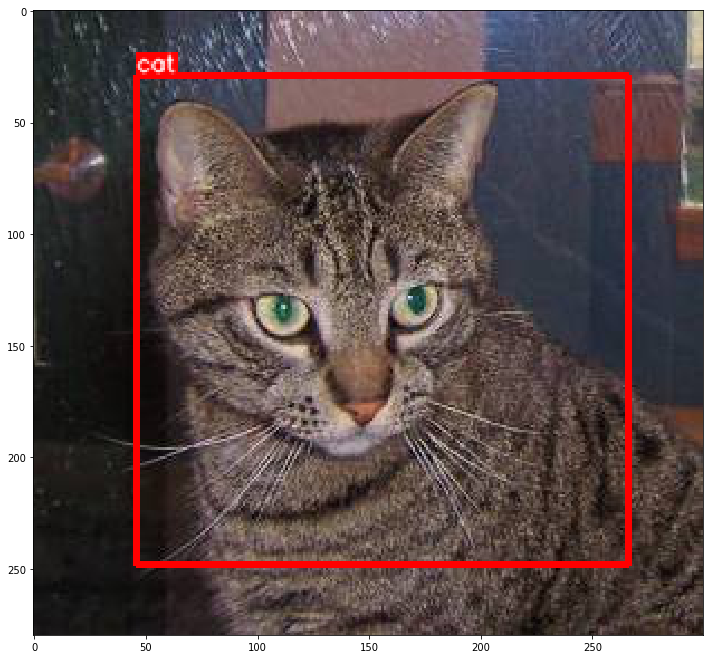

In [50]:
# 画像を表示
annotations = {'image': image, 'bboxes': box_list, 'category_id': label_list}
category_id_to_name = {0: 'cat', 1: 'dog'}
visualize(annotations, category_id_to_name)

In [51]:
# 別の画像で読み込み
image = load_image('../dog_cat_datasets/validation/cat/cat.8.jpg')

# xmlファイルから画像中のアノテーションボックス位置、ラベル情報を取得
path = '../dog_cat_datasets/validation/cat/cat.8.xml'
name_to_label_id = {'cat': 0, 'dog': 1}
box_list, label_list = xml2loc(path, name_to_label_id)

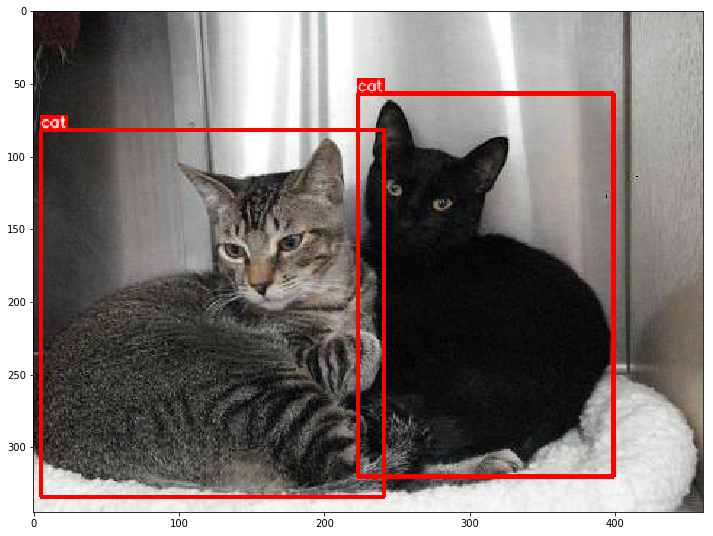

In [52]:
# 画像を表示
annotations = {'image': image, 'bboxes': box_list, 'category_id': label_list}
category_id_to_name = {0: 'cat', 1: 'dog'}
visualize(annotations, category_id_to_name)

In [53]:
# augmentation用の関数を生成
def get_aug(aug, min_area=0., min_visibility=0.):
    return Compose(aug, bbox_params={
        'format': 'pascal_voc', 
        'min_area': min_area, 
        'min_visibility': min_visibility, 
        'label_fields': ['category_id']})

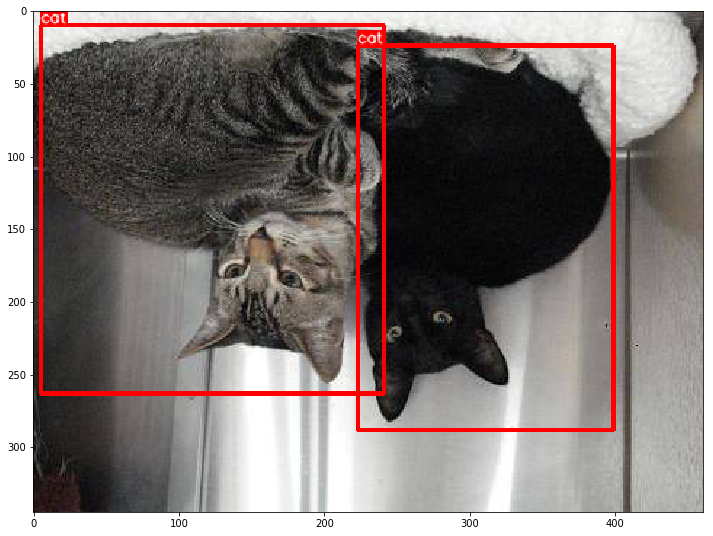

In [54]:
# 上下反転
aug = get_aug([VerticalFlip(p=1)])
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

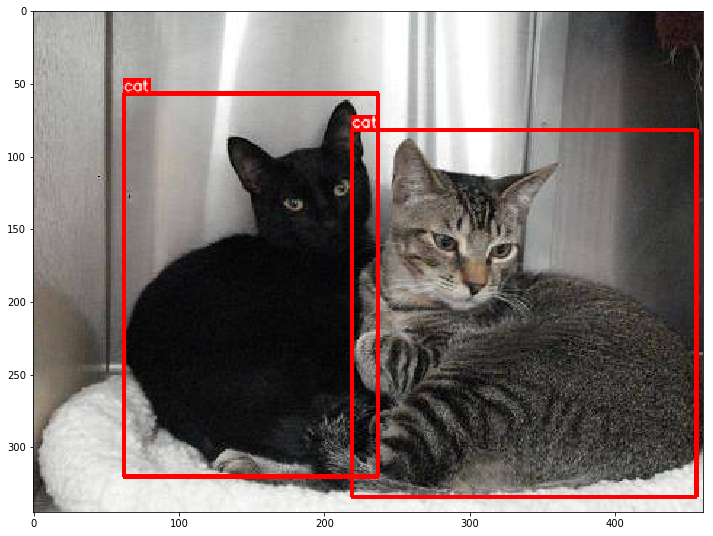

In [55]:
# 左右反転
aug = get_aug([HorizontalFlip(p=1)])
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

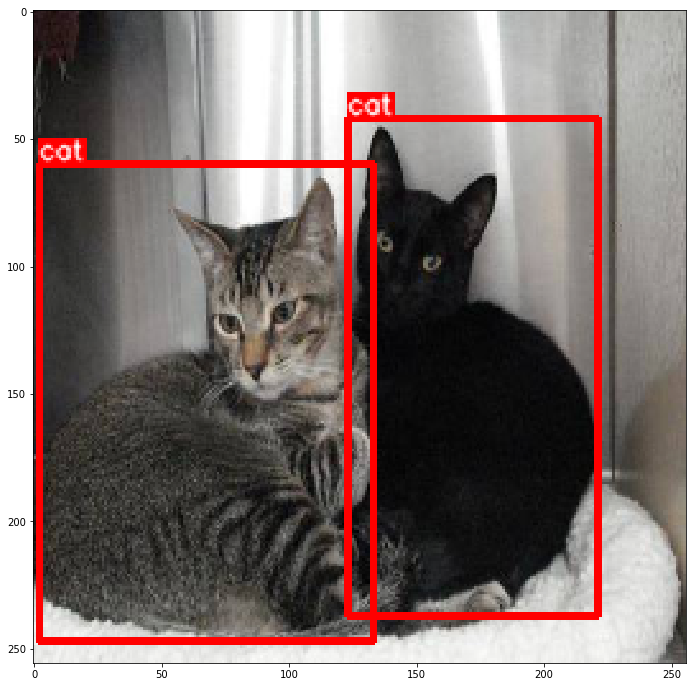

In [56]:
# 特定のピクセル数にresize
aug = get_aug([Resize(p=1, height=256, width=256)])
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

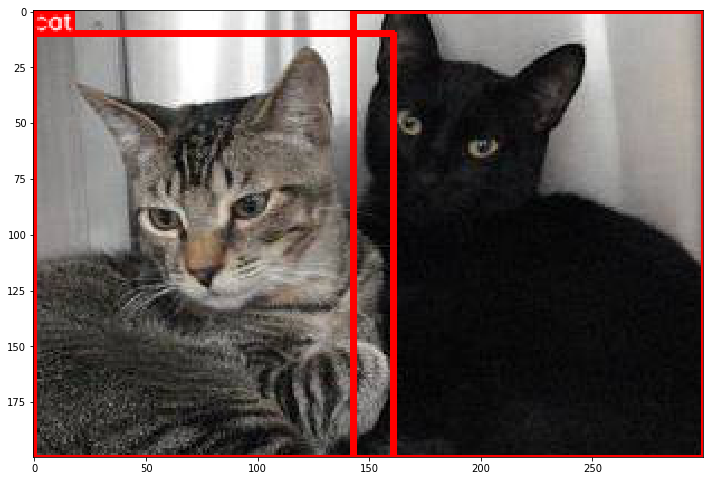

In [58]:
# 中央部でトリミング
aug = get_aug([CenterCrop(p=1, height=200, width=300)])
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

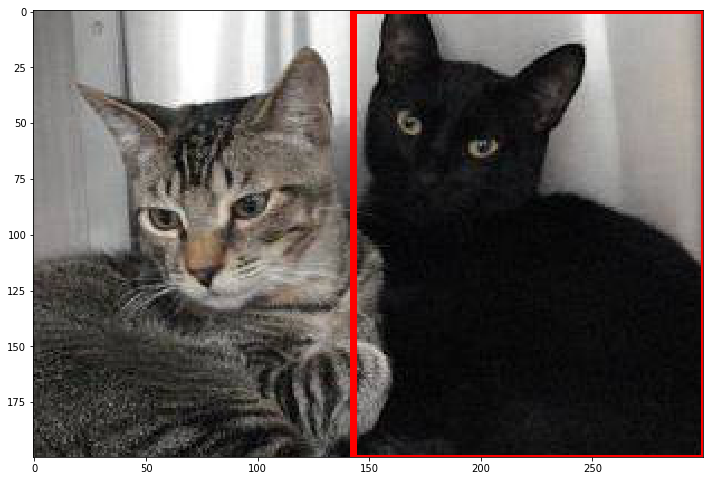

In [72]:
# min_area以下のボックスは削除
# 今回は左の猫のボックスが消滅
aug = get_aug([CenterCrop(p=1, height=200, width=300)], min_area=31000)
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

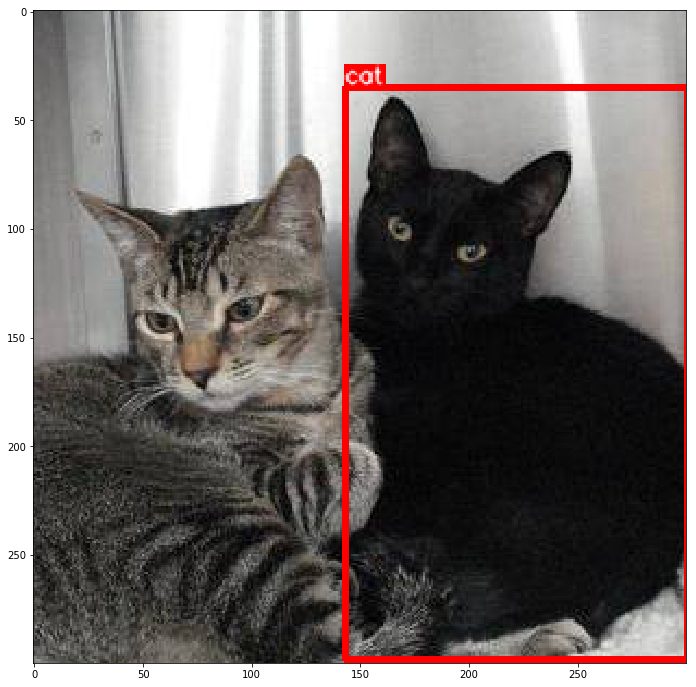

In [75]:
# トリミング領域に含まれるボックス範囲の割合がmin_visibility以下のボックスは消滅
# 今回は左の猫のボックスが消滅
aug = get_aug([CenterCrop(p=1, height=300, width=300)], min_visibility=0.7)
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)